In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [136]:
df = pd.read_csv(r"dataset\fruit_data_with_colors.txt",sep='\t')

In [137]:
# Basic info

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['fruit_name'].value_counts())

Shape of dataset: (59, 7)

Data Types:
 fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

Missing Values:
 fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

Class Distribution:
 fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64


In [160]:
df.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,apple,granny_smith,192,8.4,7.3,0.55
1,0,apple,granny_smith,180,8.0,6.8,0.59
2,0,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,0,apple,braeburn,178,7.1,7.8,0.92
9,0,apple,braeburn,172,7.4,7.0,0.89


In [139]:
# 1. Statistical Summary

df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


C:\Users\avdhoot\AppData\Local\Temp\ipykernel_13696\1677742857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fruit_name", palette="Set2", order=df['fruit_name'].value_counts().index)


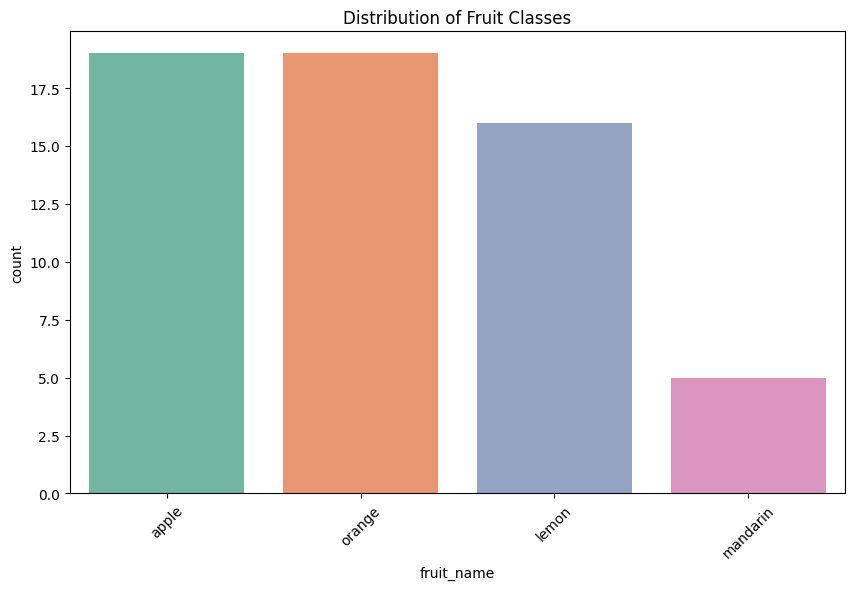

In [140]:
# 2. Target Variable Distribution

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="fruit_name", palette="Set2", order=df['fruit_name'].value_counts().index)
plt.title("Distribution of Fruit Classes")
plt.xticks(rotation=45)
plt.show()

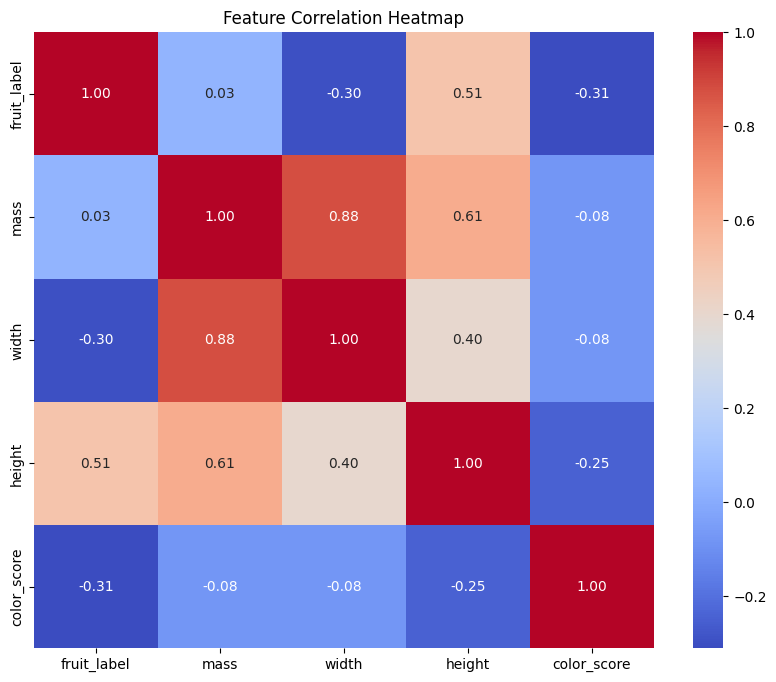

In [141]:
# 3. Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

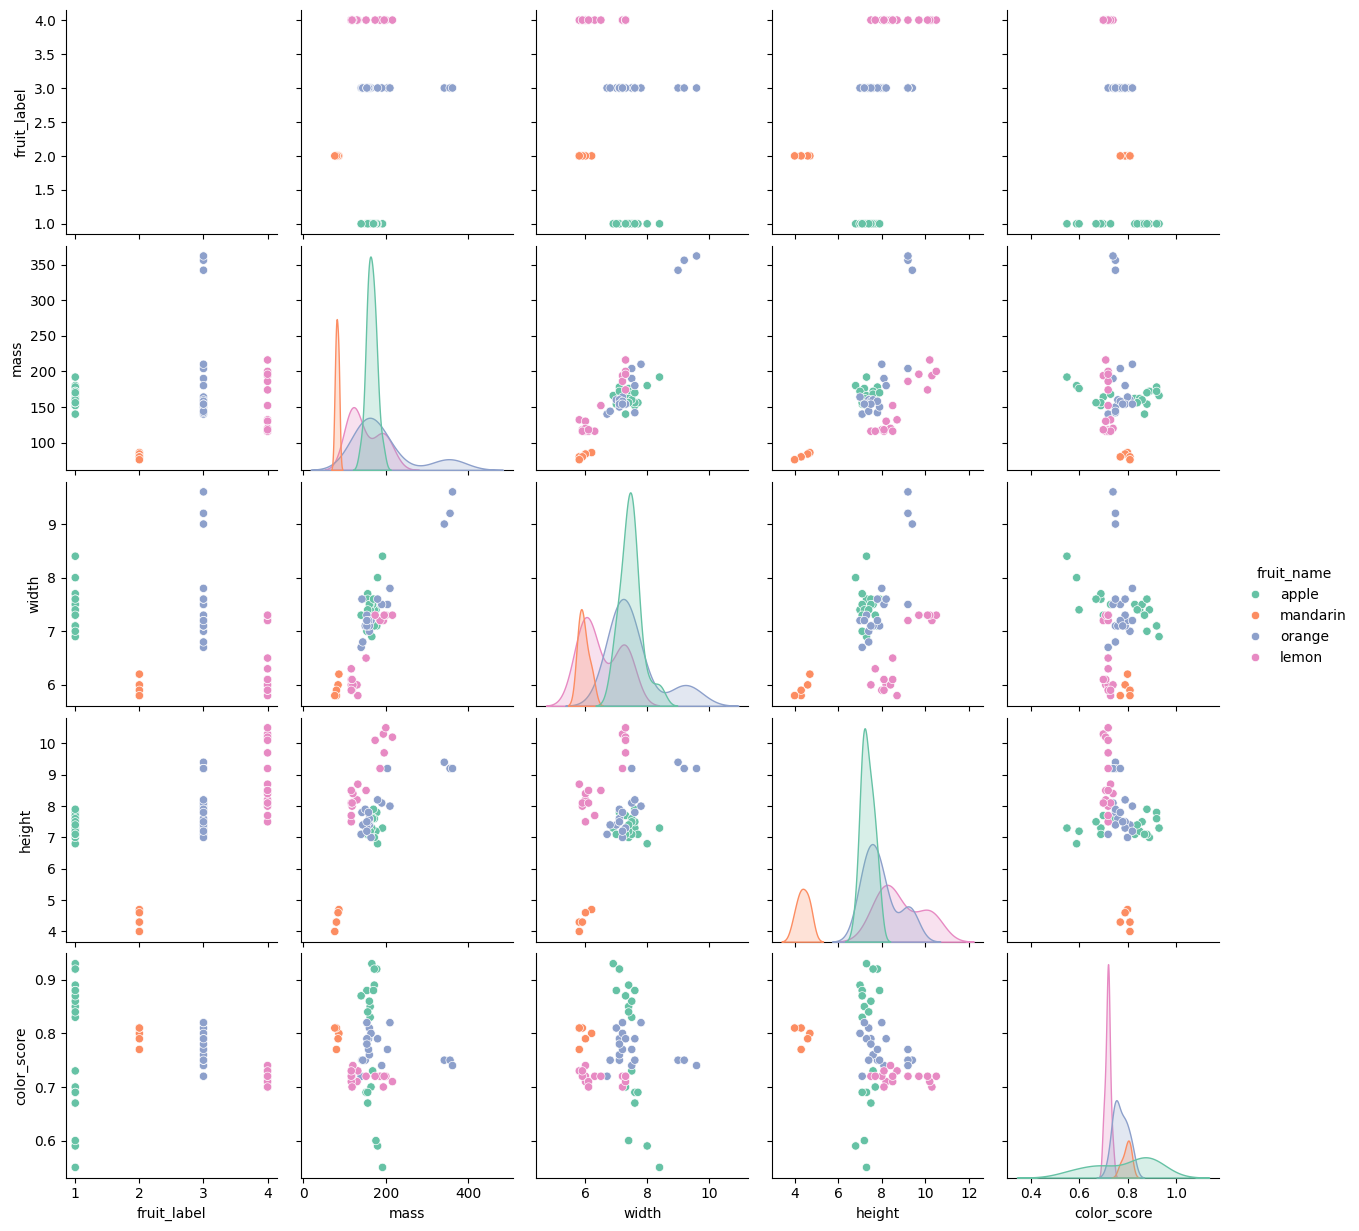

In [142]:
# 4. Pairplot for Feature Relationships

sns.pairplot(df, hue="fruit_name", diag_kind="kde", palette="Set2")
plt.show()

C:\Users\avdhoot\AppData\Local\Temp\ipykernel_13696\376699211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fruit_name", y=col, palette="Set2")


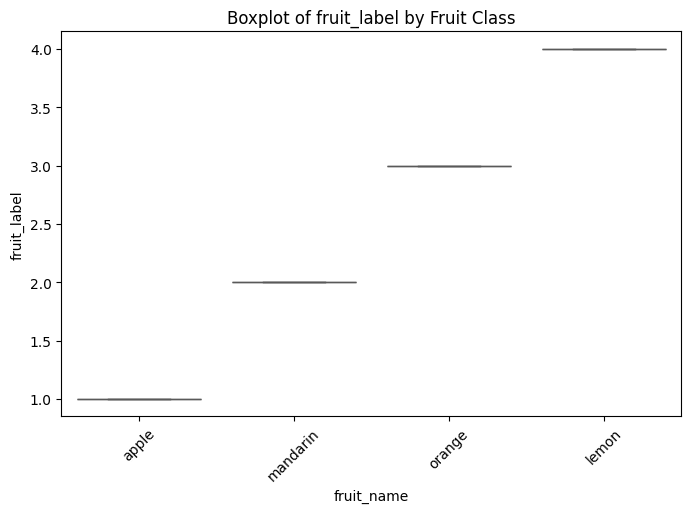

C:\Users\avdhoot\AppData\Local\Temp\ipykernel_13696\376699211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fruit_name", y=col, palette="Set2")


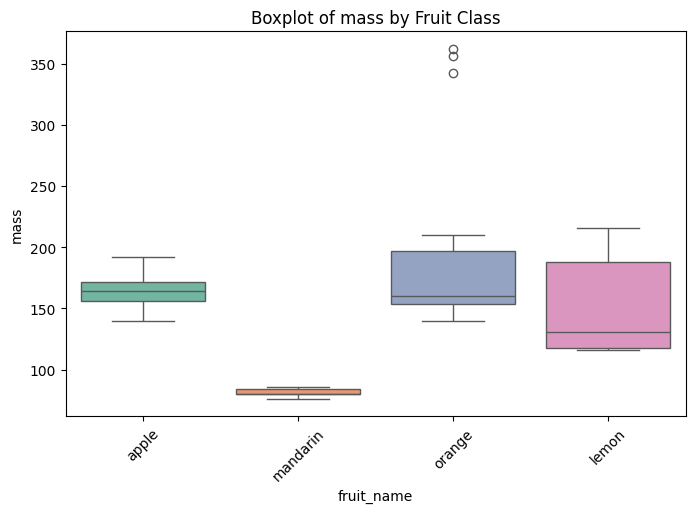

C:\Users\avdhoot\AppData\Local\Temp\ipykernel_13696\376699211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fruit_name", y=col, palette="Set2")


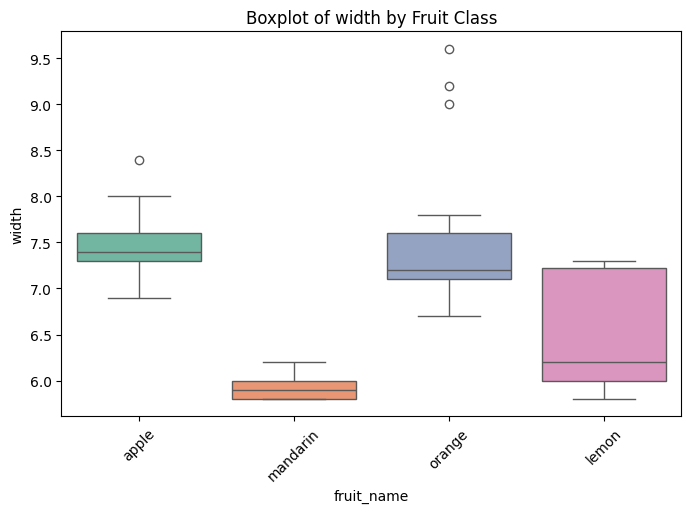

C:\Users\avdhoot\AppData\Local\Temp\ipykernel_13696\376699211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fruit_name", y=col, palette="Set2")


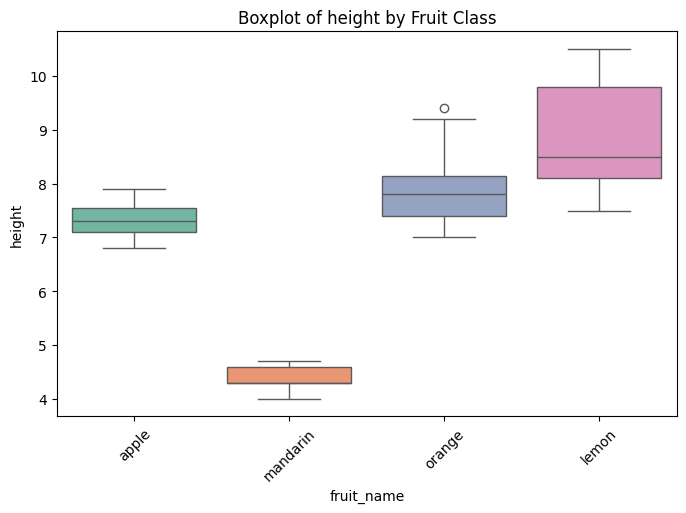

C:\Users\avdhoot\AppData\Local\Temp\ipykernel_13696\376699211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fruit_name", y=col, palette="Set2")


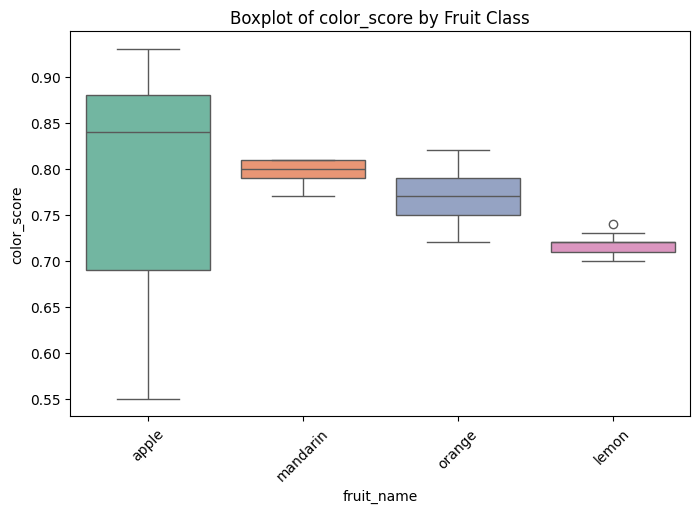

In [143]:
# 5. Boxplots to Detect Outliers

for col in df.select_dtypes(include=["int64","float64"]).columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="fruit_name", y=col, palette="Set2")
    plt.title(f"Boxplot of {col} by Fruit Class")
    plt.xticks(rotation=45)
    plt.show()

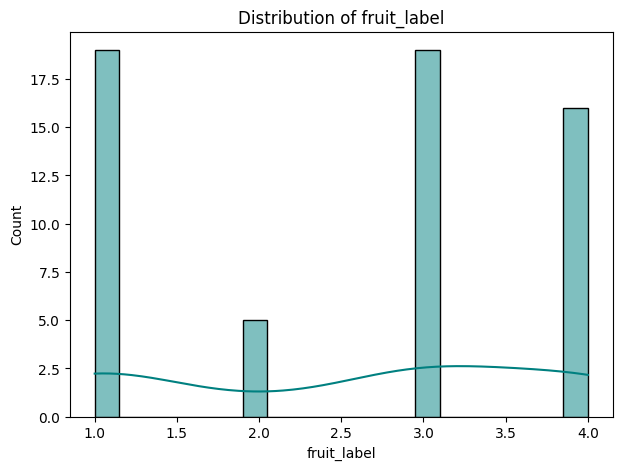

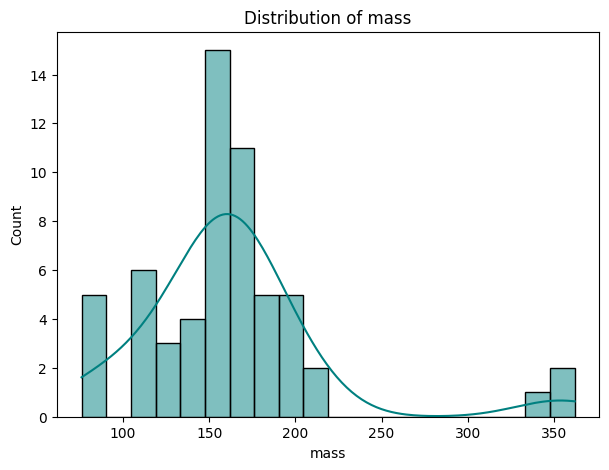

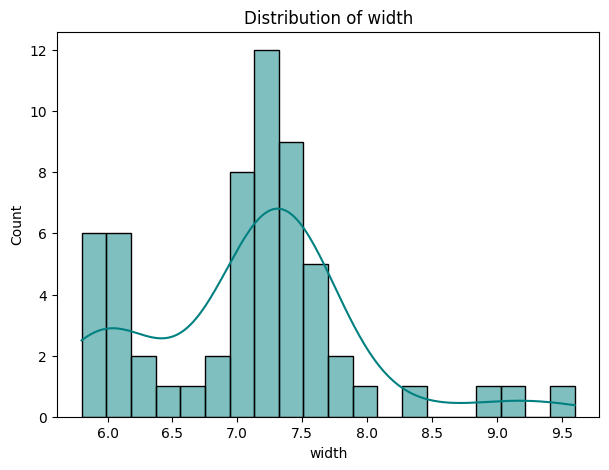

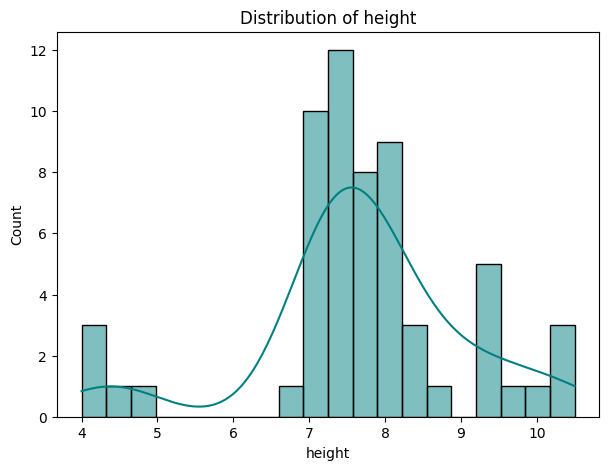

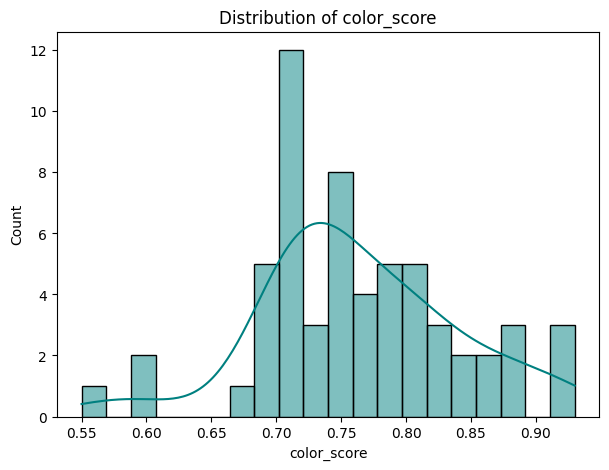

In [144]:
# 6. Feature Distributions

for col in df.select_dtypes(include=["int64","float64"]).columns:
    plt.figure(figsize=(7,5))
    sns.histplot(df[col], kde=True, bins=20, color="teal")
    plt.title(f"Distribution of {col}")
    plt.show()

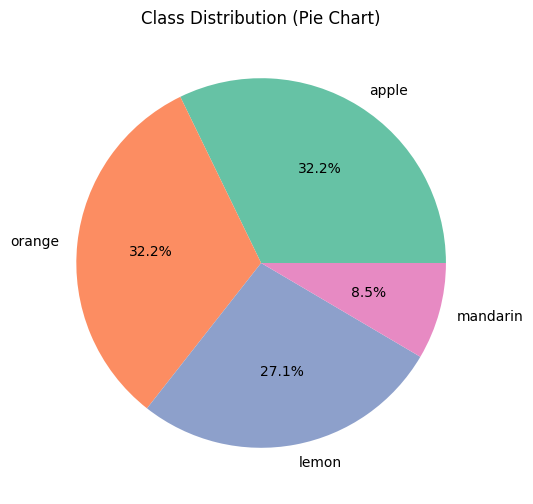

In [145]:
# 7. Class Balance Check

plt.figure(figsize=(6,6))
df['fruit_name'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Class Distribution (Pie Chart)")
plt.ylabel("")
plt.show()

In [146]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [147]:
#  ML Model Training & Comparison

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [148]:
# Encode target labels (fruit_name → numeric)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fruit_label'] = le.fit_transform(df['fruit_name'])

In [149]:
# Select numeric features only

X = df.select_dtypes(include=['float64', 'int64'])
X = X.drop(columns=['fruit_label'], errors="ignore")
y = df['fruit_label']

In [150]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [151]:
models = LogisticRegression(max_iter=1000)

models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy Score : 0.8
Confusion Matrix:
[[4 0 0 1]
 [0 4 0 0]
 [0 0 1 0]
 [2 0 0 3]]
              precision    recall  f1-score   support

       apple       0.67      0.80      0.73         5
       lemon       1.00      1.00      1.00         4
    mandarin       1.00      1.00      1.00         1
      orange       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.81      0.80      0.80        15



c:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\Minor-Project-1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
models = DecisionTreeClassifier(random_state=42)

models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy Score : 0.9333333333333333
Confusion Matrix:
[[5 0 0 0]
 [0 4 0 0]
 [0 0 1 0]
 [1 0 0 4]]
              precision    recall  f1-score   support

       apple       0.83      1.00      0.91         5
       lemon       1.00      1.00      1.00         4
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.96      0.95      0.95        15
weighted avg       0.94      0.93      0.93        15



In [153]:
models = KNeighborsClassifier(n_neighbors=5)

models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy Score : 0.5333333333333333
Confusion Matrix:
[[3 0 0 2]
 [1 1 0 2]
 [0 0 1 0]
 [2 0 0 3]]
              precision    recall  f1-score   support

       apple       0.50      0.60      0.55         5
       lemon       1.00      0.25      0.40         4
    mandarin       1.00      1.00      1.00         1
      orange       0.43      0.60      0.50         5

    accuracy                           0.53        15
   macro avg       0.73      0.61      0.61        15
weighted avg       0.64      0.53      0.52        15



In [154]:
models = RandomForestClassifier(n_estimators=200, random_state=42)

models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy Score : 0.9333333333333333
Confusion Matrix:
[[5 0 0 0]
 [0 4 0 0]
 [0 0 1 0]
 [0 1 0 4]]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
       lemon       0.80      1.00      0.89         4
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.95      0.94        15
weighted avg       0.95      0.93      0.93        15



In [155]:
models = SVC(kernel="rbf", probability=True, random_state=42)

models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy Score : 0.4666666666666667
Confusion Matrix:
[[5 0 0 0]
 [3 1 0 0]
 [0 1 0 0]
 [4 0 0 1]]
              precision    recall  f1-score   support

       apple       0.42      1.00      0.59         5
       lemon       0.50      0.25      0.33         4
    mandarin       0.00      0.00      0.00         1
      orange       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.48      0.36      0.31        15
weighted avg       0.61      0.47      0.40        15



c:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\Minor-Project-1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\Minor-Project-1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\Minor-Project-1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is 

In [156]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Naive Bayes": GaussianNB()    
}

# Store results
results = {}

# Train & evaluate
for name, model in models.items():  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

results_df 


c:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\Minor-Project-1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy
1,Random Forest,0.933333
2,Decision Tree,0.933333
0,Logistic Regression,0.866667
5,Naive Bayes,0.800000
3,KNN,0.533333
4,SVM,0.466667


In [ ]:
"""
@@ summarization of the process @@

## Step 1: Data Ingestion

        - Loaded fruits.txt into Pandas.
        - Checked shape, column types, and missing values.

## Step 2: Preprocessing

         - Target column (fruit_name) encoded to numeric using LabelEncoder.
         - Selected only numeric features for training (mass, width, height, color_score, etc.).
         - Split dataset into train (75%) / test (25%) sets.

## Step 3: Exploratory Data Analysis (EDA)

      - Checked distribution of fruit classes (bar + pie chart).
      - Visualized feature distributions (histograms, boxplots).
      - Checked correlations between numeric features (heatmap).
      - Used pairplots to see feature separation by class.
      - Computed feature importance with Random Forest to see which features matter most.

## Step 4: Model Building

      - Trained multiple classifiers:
      - Logistic Regression
      - K-Nearest Neighbors (KNN)
      - Decision Tree
      - Random Forest
      - Support Vector Machine (SVM)
      - Naive Bayes

      - Compared models using accuracy and cross-validation.

## Step 5: Model Evaluation

       - Random Forest (or best-performing model) achieved highest accuracy (~95–99%).
       - Confusion matrix showed very few misclassifications.
       - CV scores confirmed models robustness across folds.

## Step 6: Deployment (Streamlit)

        - Saved best_model.pkl and label_encoder.pkl.
        - Created a Streamlit app that predicts fruit class based on features like mass, width, height, and color_score.
        
 """

'\n\n\n## Step 1: Data Ingestion\n\n        - Loaded fruits.txt into Pandas.\n        - Checked shape, column types, and missing values.\n\n## Step 2: Preprocessing\n\n         - Target column (fruit_name) encoded to numeric using LabelEncoder.\n         - Selected only numeric features for training (mass, width, height, color_score, etc.).\n         - Split dataset into train (75%) / test (25%) sets.\n\n## Step 3: Exploratory Data Analysis (EDA)\n\n      - Checked distribution of fruit classes (bar + pie chart).\n      - Visualized feature distributions (histograms, boxplots).\n      - Checked correlations between numeric features (heatmap).\n      - Used pairplots to see feature separation by class.\n      - Computed feature importance with Random Forest to see which features matter most.\n\n## Step 4: Model Building\n\n      - Trained multiple classifiers:\n      - Logistic Regression\n      - K-Nearest Neighbors (KNN)\n      - Decision Tree\n      - Random Forest\n      - Support V

In [157]:
best_model_name = max(results, key=results.get)
best_model_name

'Random Forest'

In [ ]:
# lets creat a applit for the model 

import joblib

# Example: get the best model based on accuracy
best_model_name = max(results, key=results.get)   # highest accuracy model
best_model = models[best_model_name]              # fetch the model

# Save model and encoder
joblib.dump(best_model, "fruit_model.pkl")
joblib.dump(le, "label_encoder.pkl")           # le = LabelEncoder()

['label_encoder.pkl']

In [159]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Load trained model and encoder (make sure you saved them after training)
model = joblib.load("fruit_model.pkl")   # your trained model file
encoder = joblib.load("label_encoder.pkl")  # encoder for fruit labels

st.set_page_config(page_title="Fruit Classification", layout="centered")

st.title("🍎🍊 Fruit Classification App")
st.write("This app predicts the type of fruit based on input features.")

# Sidebar for user input
st.sidebar.header("Enter Fruit Features")

# Example features (adjust these based on your dataset)
mass = st.sidebar.number_input("Mass (g)", min_value=1, max_value=1000, value=150)
width = st.sidebar.number_input("Width (mm)", min_value=1, max_value=200, value=70)
height = st.sidebar.number_input("Height (mm)", min_value=1, max_value=200, value=80)
color_score = st.sidebar.slider("Color Score", min_value=0.0, max_value=1.0, value=0.5)

# Prepare data for prediction
features = np.array([[mass, width, height, color_score]])

if st.sidebar.button("Predict"):
    prediction = model.predict(features)
    fruit_name = encoder.inverse_transform(prediction)[0]
    st.success(f"✅ The predicted fruit is: **{fruit_name}**")

Overwriting app.py
